In [1]:
import sys
sys.path.append('/Users/tamurashuntarou/CML/code/master_shap')
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

/Users/tamurashuntarou/CML/code/master_shap/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# データセットの読み込み
california = fetch_california_housing()
X, y = california.data, california.target

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの訓練
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

/Users/tamurashuntarou/CML/code/master_shap/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# SHAP値の計算
background = shap.sample(X_train, 10)
explainer = shap.KernelExplainer(model.predict, background)
shap_values = explainer(X_test)

  6%|▋         | 263/4128 [00:05<01:17, 49.85it/s]


KeyboardInterrupt: 

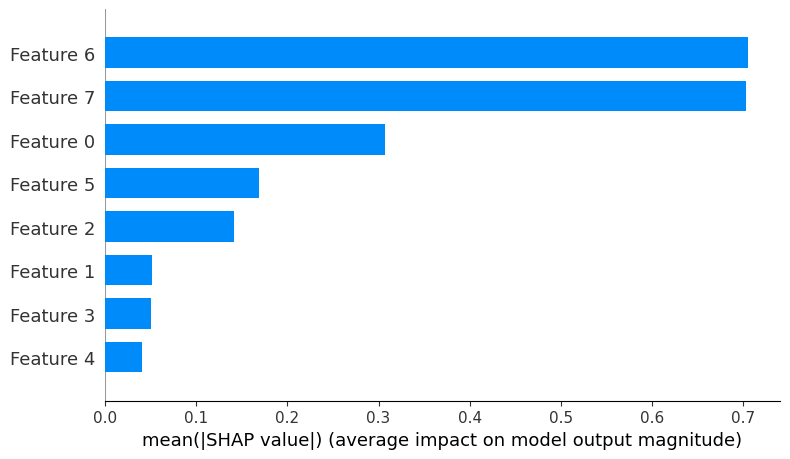

In [6]:
# SHAP値のプロット
shap.summary_plot(shap_values, X_test, plot_type="bar")